In [234]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
# Importando dados
resultados = pd.read_csv('dados/results.csv')
penaltis = pd.read_csv('dados/shootouts.csv')
marcadores = pd.read_csv('dados/goalscorers.csv')

In [236]:
resultados.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


#### Tratando resultados

In [237]:
# Alterando nome colunas
resultados.columns = ['ano','casa','visitante','gols_casa','gols_visitante','torneio','cidade','pais','neutro']

In [238]:
# Extraindo ano da data 
resultados['ano'] = pd.to_datetime(resultados['ano'])
resultados['ano'] = resultados['ano'].dt.year

In [239]:
# Verificando nulos
resultados.isnull().sum()

ano               0
casa              0
visitante         0
gols_casa         0
gols_visitante    0
torneio           0
cidade            0
pais              0
neutro            0
dtype: int64

In [240]:
# Removendo duplicatas
resultados.drop_duplicates()

,ano,casa,visitante,gols_casa,gols_visitante,torneio,cidade,pais,neutro
0,1872,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873,England,Scotland,4,2,Friendly,London,England,False
2,1874,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875,England,Scotland,2,2,Friendly,London,England,False
4,1876,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
45310,2023,Wales,Turkey,1,1,UEFA Euro qualification,Cardiff,Wales,False
45311,2023,Croatia,Armenia,1,0,UEFA Euro qualification,Zagreb,Croatia,False
45312,2023,Andorra,Israel,0,2,UEFA Euro qualification,Andorra la Vella,Andorra,False
45313,2023,Kosovo,Belarus,0,1,UEFA Euro qualification,Pristina,Kosovo,False


#### Tratando pênaltis

In [241]:
penaltis.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


In [242]:
# Alterando nome colunas
penaltis.columns = ['ano','casa','visitante','vencedor','primeiro_batedor']

In [243]:
# Extraindo ano da data 
penaltis['ano'] = pd.to_datetime(penaltis['ano'])
penaltis['ano'] = penaltis['ano'].dt.year

In [244]:
# Verificando nulos
penaltis.isnull().sum()

ano                   0
casa                  0
visitante             0
vencedor              0
primeiro_batedor    476
dtype: int64

In [245]:
# A maioria do campo primeiro_batedor é nula então irei mantê-los e trabalhar com os não nulos posteriormente
penaltis.shape

(562, 5)

#### Tratando marcadores

In [246]:
marcadores.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [247]:
marcadores.shape

(43189, 8)

In [248]:
# Alterando nome colunas
marcadores.columns = ['ano','casa','visitante','time','marcador','minuto','gol_contra','penalti']

In [249]:
# Extraindo ano da data 
marcadores['ano'] = pd.to_datetime(marcadores['ano'])
marcadores['ano'] = marcadores['ano'].dt.year

In [250]:
# Verificando nulos
marcadores.isnull().sum()

ano             0
casa            0
visitante       0
time            0
marcador       50
minuto        260
gol_contra      2
penalti         2
dtype: int64

In [251]:
marcadores.loc[marcadores['marcador'].isnull()]

,ano,casa,visitante,time,marcador,minuto,gol_contra,penalti
8108,1980,Vanuatu,Papua New Guinea,Papua New Guinea,NaN,NaN,False,False
8109,1980,Vanuatu,Papua New Guinea,Papua New Guinea,NaN,NaN,False,False
8110,1980,Vanuatu,Papua New Guinea,Papua New Guinea,NaN,NaN,False,False
8111,1980,Vanuatu,Papua New Guinea,Papua New Guinea,NaN,NaN,False,False
8112,1980,Vanuatu,Papua New Guinea,Vanuatu,NaN,NaN,False,False
8113,1980,Vanuatu,Papua New Guinea,Vanuatu,NaN,NaN,False,False
8114,1980,Vanuatu,Papua New Guinea,Vanuatu,NaN,NaN,False,False
8115,1980,Fiji,Solomon Islands,Fiji,NaN,NaN,False,False
8116,1980,Fiji,Solomon Islands,Fiji,NaN,NaN,False,False
8117,1980,Fiji,Solomon Islands,Fiji,NaN,NaN,False,False


In [252]:
# Removendo Nulos
marcadores.dropna(subset=['marcador','penalti','gol_contra'],inplace=True)

In [253]:
# Extraindo minuto médio de gols para preencher nulos
media = marcadores['minuto'].mean().round()
media

50.0

In [254]:
# Preenchendo nulos com a média
marcadores.fillna(media,inplace=True)

# Análise exploratória

### Resultados

In [255]:
# Criando coluna 'vencedor' através da comparação de 'gols_casa' e 'gols_visitante' e retornando o nome correspondente  nas colunas casa e visitante ou indicando empate
resultados['vencedor'] = resultados.apply(lambda row: row['casa'] if row['gols_casa'] > row['gols_visitante'] else (row['visitante'] if row['gols_visitante'] > row['gols_casa'] else 'empate'), axis=1)
# Criando coluna 'vencedor_m' através da comparação da coluna 'vencedor' com as colunas 'visitante' e 'casa' e retornando se o tive vencedor jogava em casa ou era visitante
resultados['vencedor_m'] = resultados.apply(lambda row: 'casa' if row['vencedor'] == row['casa'] else ('visitante' if row['vencedor'] == row['visitante'] else 'empate'), axis=1)

resultados

,ano,casa,visitante,gols_casa,gols_visitante,torneio,cidade,pais,neutro,vencedor,vencedor_m
0,1872,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,empate,empate
1,1873,England,Scotland,4,2,Friendly,London,England,False,England,casa
2,1874,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,casa
3,1875,England,Scotland,2,2,Friendly,London,England,False,empate,empate
4,1876,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,casa
...,...,...,...,...,...,...,...,...,...,...,...
45310,2023,Wales,Turkey,1,1,UEFA Euro qualification,Cardiff,Wales,False,empate,empate
45311,2023,Croatia,Armenia,1,0,UEFA Euro qualification,Zagreb,Croatia,False,Croatia,casa
45312,2023,Andorra,Israel,0,2,UEFA Euro qualification,Andorra la Vella,Andorra,False,Israel,visitante
45313,2023,Kosovo,Belarus,0,1,UEFA Euro qualification,Pristina,Kosovo,False,Belarus,visitante


In [256]:
# Verificando o resultado mais frequente
resultados['vencedor'].mode()

0    empate
Name: vencedor, dtype: object

### 3 Times mais vencedores

In [257]:
# Selecionando times vencedores 
maiores_vencedores = resultados[resultados['vencedor']!='empate']['vencedor'].value_counts().head(3)
maiores_vencedores

vencedor
Brazil     659
England    605
Germany    577
Name: count, dtype: int64

### Time que menos venceu

In [258]:
resultados['vencedor'].value_counts().idxmin()

'Romani people'

### Número de vitórias e empates por mando de campo

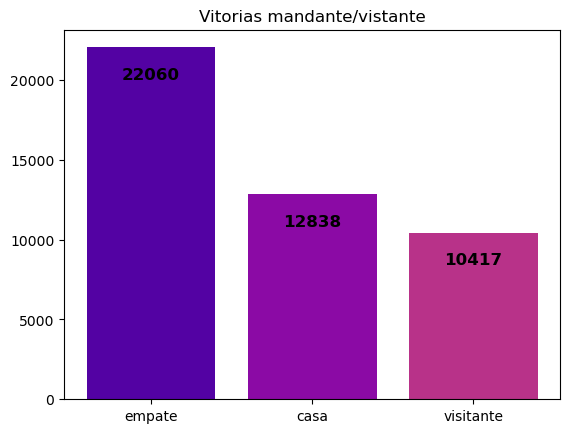

In [259]:
cores = sns.color_palette(palette='plasma')
grafico = plt.bar(resultados['vencedor_m'].unique(),resultados['vencedor_m'].value_counts(),color=cores)
plt.title('Vitorias mandante/vistante')
plt.bar_label(grafico,padding=-25,fontsize=12,label_type='edge',fontweight='bold')
plt.show()

## Séries temporais

In [260]:
# Criando coluna 'total_gols' com o total de gols marcados em cada partida
resultados['total_gols'] = resultados['gols_casa'] + resultados['gols_visitante']

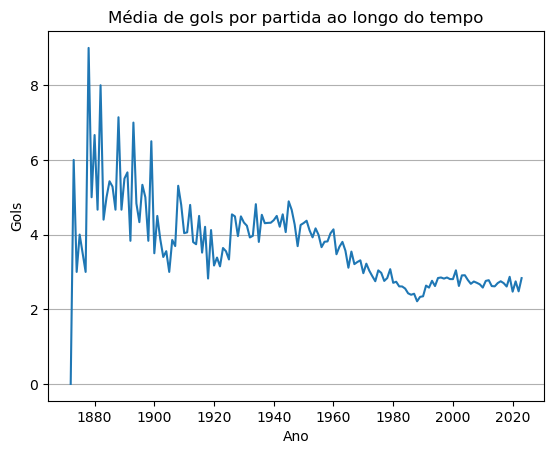

In [261]:
# Extraindo a média de gols por ano
anos_media = resultados.groupby('ano',as_index=False)['total_gols'].mean()
plt.plot(anos_media['ano'], anos_media['total_gols']) 
plt.xlabel("Ano") 
plt.ylabel("Gols") 
plt.title("Média de gols por partida ao longo do tempo") 
plt.grid(axis = 'y')
plt.show()

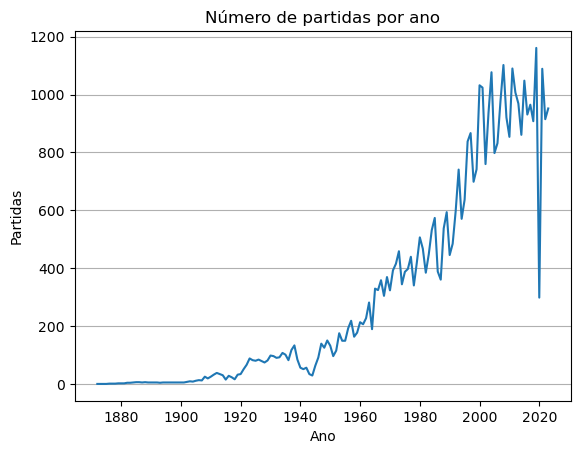

In [262]:
# Extraindo número de partidas por ano
partida_ano = resultados.groupby('ano',as_index=False).size()
plt.plot(partida_ano['ano'], partida_ano['size']) 
plt.xlabel("Ano") 
plt.ylabel("Partidas") 
plt.title("Número de partidas por ano") 
plt.grid(axis = 'y')
plt.show()


In [263]:
# Extraindo vencedor eliminando empates
resultados_ex = resultados.drop(resultados[resultados['vencedor'] == 'empate'].index)
resultados_ex

,ano,casa,visitante,gols_casa,gols_visitante,torneio,cidade,pais,neutro,vencedor,vencedor_m,total_gols
1,1873,England,Scotland,4,2,Friendly,London,England,False,England,casa,6
2,1874,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,casa,3
4,1876,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,casa,3
5,1876,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,Scotland,casa,4
6,1877,England,Scotland,1,3,Friendly,London,England,False,Scotland,visitante,4
...,...,...,...,...,...,...,...,...,...,...,...,...
45308,2023,Gibraltar,Netherlands,0,6,UEFA Euro qualification,Faro-Loulé,Portugal,True,Netherlands,visitante,6
45311,2023,Croatia,Armenia,1,0,UEFA Euro qualification,Zagreb,Croatia,False,Croatia,casa,1
45312,2023,Andorra,Israel,0,2,UEFA Euro qualification,Andorra la Vella,Andorra,False,Israel,visitante,2
45313,2023,Kosovo,Belarus,0,1,UEFA Euro qualification,Pristina,Kosovo,False,Belarus,visitante,1


In [264]:
# Exportando resultados excluindo sem empates
resultados_ex.to_csv('dados/resultados.csv')

## Pênaltis

### Times mais vencedores em disputa por pênaltis

In [265]:
maiores_vencedores_penalti = penaltis['vencedor'].value_counts().head(3)
maiores_vencedores_penalti

vencedor
Argentina      14
Zambia         13
South Korea    13
Name: count, dtype: int64

### Time menos vencedor em disputa por pênaltis

In [266]:
penaltis['vencedor'].value_counts().idxmin()

'Raetia'

### Distribuição de vitórias entre primeiro e segundo batedor

In [267]:
# Filtrando penaltis para valores 'primeiro_betedor' não nulo
penalti_batedor = penaltis[~penaltis['primeiro_batedor'].isnull()]

In [268]:
# Identificando se o vencedor foi o primeiro ou o segundo batedor
penalti_batedor = penalti_batedor.copy()
penalti_batedor['vencedor_b'] = penalti_batedor.apply(lambda row: 'Primeiro' if row['vencedor'] == row['primeiro_batedor'] else 'Segundo', axis=1)
penalti_batedor

,ano,casa,visitante,vencedor,primeiro_batedor,vencedor_b
24,1976,Czechoslovakia,Germany,Czechoslovakia,Czechoslovakia,Primeiro
37,1980,Italy,Czechoslovakia,Czechoslovakia,Italy,Segundo
48,1982,Germany,France,Germany,France,Segundo
65,1984,Denmark,Spain,Spain,Denmark,Segundo
84,1986,Brazil,France,France,Brazil,Segundo
...,...,...,...,...,...,...
542,2022,Japan,Croatia,Croatia,Japan,Segundo
543,2022,Morocco,Spain,Morocco,Morocco,Primeiro
544,2022,Croatia,Brazil,Croatia,Croatia,Primeiro
545,2022,Netherlands,Argentina,Argentina,Netherlands,Segundo


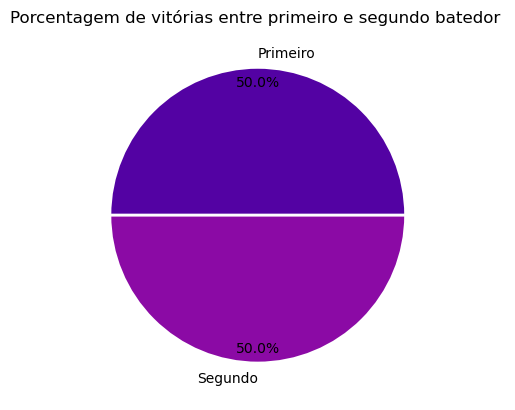

In [269]:
plt.pie(penalti_batedor['vencedor_b'].value_counts(),
        labels=penalti_batedor['vencedor_b'].unique(),
        colors=cores,              
        autopct="%1.1f%%",
        pctdistance=0.9,
       
        wedgeprops = {"edgecolor" : "white", 
                      'linewidth': 2, 
                      'antialiased': True
                      })
plt.title('Porcentagem de vitórias entre primeiro e segundo batedor ')
        

        
plt.show()

## Marcadores

In [270]:
marcadores

,ano,casa,visitante,time,marcador,minuto,gol_contra,penalti
0,1916,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...
43184,2023,Greece,France,France,Youssouf Fofana,74.0,False,False
43185,2023,Kosovo,Belarus,Belarus,Dmitry Antilevsky,43.0,False,False
43186,2023,Romania,Switzerland,Romania,Denis Alibec,50.0,False,False
43187,2023,Wales,Turkey,Wales,Neco Williams,7.0,False,False


### 3 maiores marcadores

In [271]:
top_marcadores = marcadores['marcador'].value_counts().head(3)
top_marcadores

marcador
Cristiano Ronaldo     111
Robert Lewandowski     62
Romelu Lukaku          61
Name: count, dtype: int64

### 3 maiores marcadores de pênaltis

In [272]:
top_marcadores_penalti = marcadores[marcadores['penalti']]['marcador'].value_counts().head(3)
top_marcadores_penalti

marcador
Cristiano Ronaldo    19
Harry Kane           19
Lionel Messi         14
Name: count, dtype: int64

### 3 maiores marcadores de gols contra

In [273]:
contra = marcadores[marcadores['gol_contra']]['marcador'].value_counts().head(3)
contra

marcador
Ján Ďurica        3
Rashad Sadygov    3
Gustavo Gómez     3
Name: count, dtype: int64

### 3 países mais marcadores

In [274]:
top_paises_marcadores = marcadores['time'].value_counts().head(3)
top_paises_marcadores

time
Brazil       1046
Germany       958
Argentina     914
Name: count, dtype: int64

### Minuto médio de gols

In [275]:
marcadores['minuto'].mean().round()

50.0